In [ ]:
!pip install yfinance==0.1.67
!mamba install bs4==4.10.0 -y
!pip install nbformat==4.2.0
!pip install pandas==1.3.5

In [39]:
#Tesla stock data
import yfinance as yf

tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)
tesla_data['Date'] = pd.to_datetime(tesla_data['Date'])
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,281494500,0,0.0
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,257806500,0,0.0
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,123282000,0,0.0
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,77097000,0,0.0
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,103003500,0,0.0


In [43]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data = requests.get(url).text

soup = BeautifulSoup(html_data, 'html.parser')
table = soup.find_all('tbody')[1]

tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])
for row in table.find_all('tr'):
    col = row.find_all("td")
    if col:
        date = col[0].text.strip()
        revenue = col[1].text.strip().replace(',', '').replace('$', '')
        tesla_revenue = tesla_revenue.append({"Date": date, "Revenue": revenue}, ignore_index=True)

tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]
tesla_revenue['Revenue'] = tesla_revenue['Revenue'].astype(float)
tesla_revenue['Date'] = pd.to_datetime(tesla_revenue['Date'])
tesla_revenue.tail()

,Date,Revenue
48,2010-09-30,31.0
49,2010-06-30,28.0
50,2010-03-31,21.0
52,2009-09-30,46.0
53,2009-06-30,27.0


In [45]:
#GameStop stock data

import yfinance as yf
import warnings

game_stop = yf.Ticker("GME")
gme_data = game_stop.history(period="max")
gme_data.reset_index(inplace=True)
gme_data['Date'] = pd.to_datetime(gme_data['Date'])
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13,1.620128,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19,1.666417,1.666417,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [46]:
import warnings
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_data = requests.get(url).text

soup = BeautifulSoup(html_data, 'html.parser')
table = soup.find_all('tbody')[1]

gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])
for row in table.find_all('tr'):
    col = row.find_all("td")
    if col:
        date = col[0].text.strip()
        revenue = col[1].text.strip().replace(',', '').replace('$', '')
        gme_revenue = gme_revenue.append({"Date": date, "Revenue": revenue}, ignore_index=True)

gme_revenue.dropna(inplace=True)
gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""]
gme_revenue['Revenue'] = gme_revenue['Revenue'].astype(float)
gme_revenue['Date'] = pd.to_datetime(gme_revenue['Date'])
gme_revenue.tail()

,Date,Revenue
57,2006-01-31,1667.0
58,2005-10-31,534.0
59,2005-07-31,416.0
60,2005-04-30,475.0
61,2005-01-31,709.0


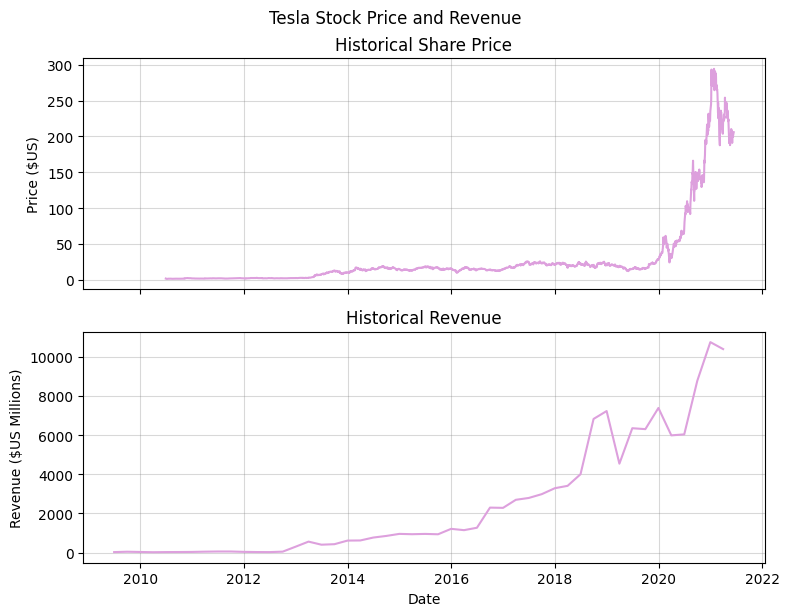

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

tesla_data_specific = tesla_data[tesla_data['Date'] <= '2021-06-14']
tesla_revenue_specific = tesla_revenue[tesla_revenue['Date'] <= '2021-04-30']

fig, axes = plt.subplots(2, 1, figsize=(8, 6), sharex=True)

sns.lineplot(ax=axes[0], x=tesla_data_specific['Date'], y=tesla_data_specific['Close'], color='plum')
axes[0].set_title('Historical Share Price')
axes[0].set_ylabel('Price ($US)')
axes[0].grid(True, color='gray', alpha=0.3)

sns.lineplot(ax=axes[1], x=tesla_revenue_specific['Date'], y=tesla_revenue_specific['Revenue'], color='plum')
axes[1].set_title('Historical Revenue')
axes[1].set_ylabel('Revenue ($US Millions)')
axes[1].set_xlabel('Date')
axes[1].grid(True, color='gray', alpha=0.3)

plt.tight_layout()
plt.suptitle('Tesla Stock Price and Revenue', y=1.02)
plt.show()

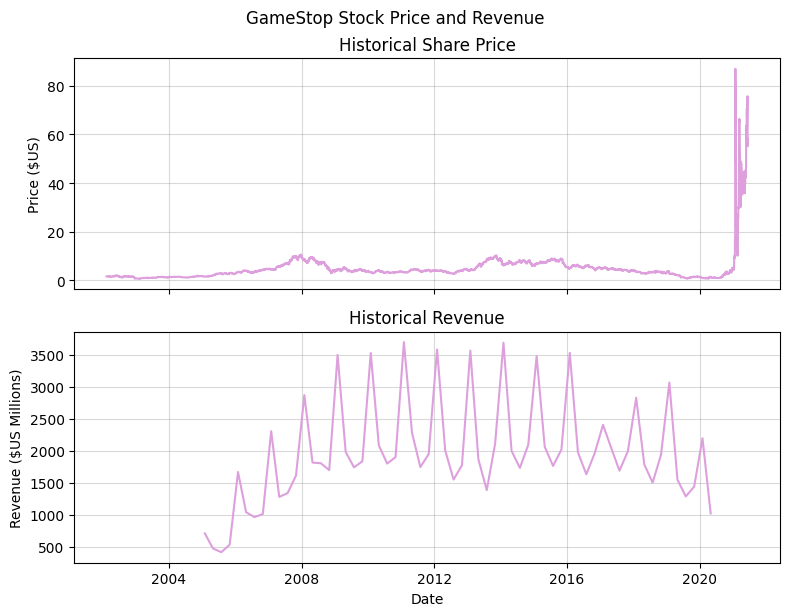

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns

gme_data_specific = gme_data[gme_data['Date'] <= '2021-06-14']
gme_revenue_specific = gme_revenue[gme_revenue['Date'] <= '2021-04-30']

fig, axes = plt.subplots(2, 1, figsize=(8, 6), sharex=True)

sns.lineplot(ax=axes[0], x=gme_data_specific['Date'], y=gme_data_specific['Close'], color='plum')
axes[0].set_title('Historical Share Price')
axes[0].set_ylabel('Price ($US)')
axes[0].grid(True, color='gray', alpha=0.3)

sns.lineplot(ax=axes[1], x=gme_revenue_specific['Date'], y=gme_revenue_specific['Revenue'], color='plum')
axes[1].set_title('Historical Revenue')
axes[1].set_ylabel('Revenue ($US Millions)')
axes[1].set_xlabel('Date')
axes[1].grid(True, color='gray', alpha=0.3)

plt.tight_layout()
plt.suptitle('GameStop Stock Price and Revenue', y=1.02)
plt.show()